<a href="https://colab.research.google.com/github/nabiila-29/data-fellowship-5/blob/main/Nabiila_Practice_Case_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Data Preprocessing

In [1]:
import pandas as pd

In [27]:
df = pd.read_csv("epl_1819-eda.csv", thousands=",")
df.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,26581,112,1814,4240,783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,23638,98,2250,3416,721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,25070,146,1774,3874,692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,21295,87,2267,3191,643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,20805,65,2062,3102,605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3


# 1. Whether this data is clean?


In [28]:
df.isnull().sum()                                 #check the missing value 

Team                             0
category                         0
general_league_position          0
finance _live_games_televised    0
finance _tv_revenue              0
general_matches_played           0
general_won                      0
general_draw                     0
general_lost                     0
attack_scored                    0
defence_goals_conceeded          0
general_goal_difference          0
general_points                   0
general_squad_size               0
general_squad_average_age        0
general_squad_foreigners         0
finance _team_market             0
finance _market_average          0
attack_passes                    0
attack_passes_through            0
attack_passes_long               0
attack_passes_back               0
attack_crosses                   0
attack_corners_taken             0
attack_shots                     0
attack_shots_on_target           0
attack_goals_headed              0
attack_goals_penalty             0
attack_goals_box    

There is no missing value. The data is clean

# 2. How is the point distribution of the epl team? and which team is an anomaly?
 

## 1st Normality Test (Histogram)

In [29]:
# Import the libraries
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


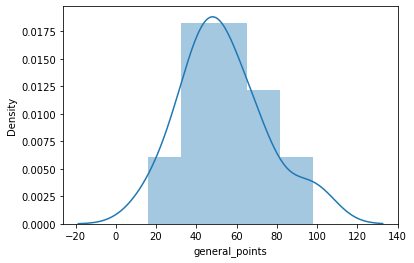

In [30]:
sns.distplot(df.general_points)

## 2nd Normality Test (QQ)

In [52]:
#import numpy as np
from scipy import stats
import scipy as scipy

<Figure size 432x288 with 0 Axes>

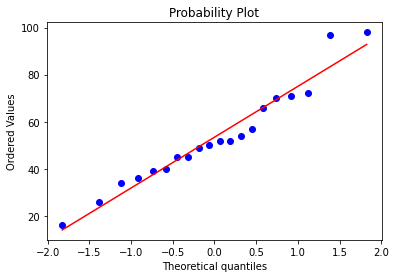

<Figure size 432x288 with 0 Axes>

In [32]:
stats.probplot(df['general_points'],plot=plt)
plt.figure()

## 3rd Normality Test (Shapiro)

In [33]:
#shairo vilk test
stats.shapiro(df['general_points'])

(0.9527729749679565, 0.41115203499794006)

we see the p-value. The p-value is the second value of the result above. The normal data has p-value 0> 0.05

the p-value of the data is 0.41115203499794006.
.
The data above is normal because the **p-value > 0.05**

## 4th Normality Test (D'Agostin's K-squared test)

In [119]:
stats.normaltest(df['general_points'])

NormaltestResult(statistic=1.946940724454761, pvalue=0.3777697627355659)

If the p-value> 0.05, the distribution of the data is normal. Above we have 0.377. The data distribution is normal

## 5th Normality Test (Chi-Square)

In [120]:
stats.chisquare(df['general_points'])

Power_divergenceResult(statistic=156.87464920486434, pvalue=1.0256897213475428e-23)

If the p-value> 0.05, the distribution of the data is normal. Above we have 1.02. The data distribution is normal

# 3. Which team has the best attack?



There some columns which have prefix 'attack'. We will sum them and sort them to find the maximum value 

In [34]:
attack = df.filter(regex='attack')
attack.head()

,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy
0,95,26581,112,1814,4240,783,298,683,260,12,3,80,15,5,2,64.0,89.0
1,89,23638,98,2250,3416,721,249,575,226,19,7,84,5,6,1,58.8,84.4
2,63,25070,146,1774,3874,692,215,607,198,8,5,54,9,1,1,59.9,87.6
3,67,21295,87,2267,3191,643,194,537,189,14,4,53,14,5,2,56.7,83.2
4,73,20805,65,2062,3102,605,209,467,170,5,4,62,11,3,3,56.1,83.3


In [35]:
attack.dtypes

attack_scored                int64
attack_passes                int64
attack_passes_through        int64
attack_passes_long           int64
attack_passes_back           int64
attack_crosses               int64
attack_corners_taken         int64
attack_shots                 int64
attack_shots_on_target       int64
attack_goals_headed          int64
attack_goals_penalty         int64
attack_goals_box             int64
attack_goals_outsidebox      int64
attack_goals_counter         int64
attack_goals_freekick        int64
attack_posession           float64
attack_pass_accuracy       float64
dtype: object

In [59]:
df['sum_attack'] = attack.sum(axis=1)               #create new column as the sum of all column with  prefix 'attack...'
df.head(2)

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy,sum_attack
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,26581,112,1814,4240,783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0,35136.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,23638,98,2250,3416,721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4,31527.2


In [60]:
best_attack = df[['Team', 'sum_attack']].sort_values('sum_attack', ascending=False)
best_attack.head(1)

,Team,sum_attack
0,Manchester City,35136.0


Based on the sum of attack score, Manchester City has the best attack.

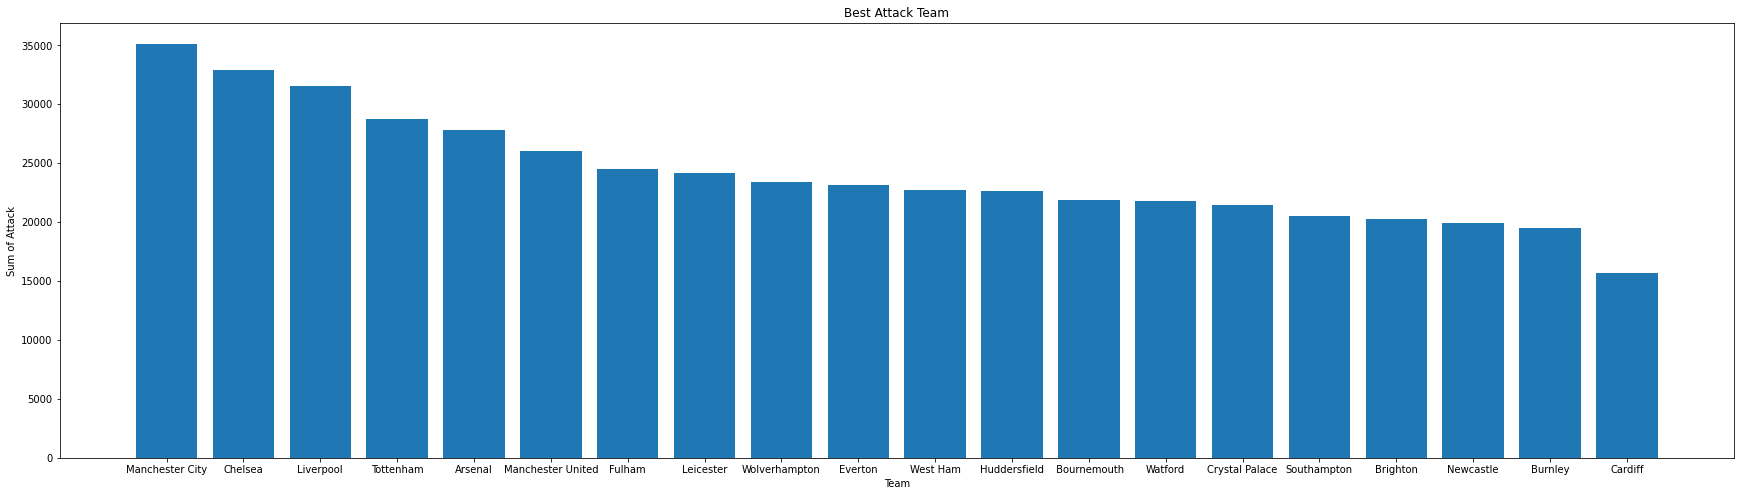

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,8))
plt.bar(best_attack['Team'], best_attack['sum_attack'],)
plt.title('Best Attack Team')
plt.xlabel('Team')
plt.ylabel('Sum of Attack')
plt.show()

# 4. Which team has the best defence?

There some columns which have prefix 'defence'. We will sum them and sort them to find the maximum value 

In [89]:
defence = df.filter(regex='defence')
defence.head()

,defence_goals_conceeded,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded
0,23,58,63,362,518,0,543,295,4
1,22,76,78,314,610,2,639,317,1
2,39,85,73,351,618,2,593,330,2
3,39,121,112,326,626,3,770,411,5
4,51,133,118,412,609,2,762,404,7


In [90]:
defence.dtypes

defence_goals_conceeded      int64
defence_saves                int64
defence_blocks               int64
defence_interceptions        int64
defence_tackles              int64
defence_tackles_last_man     int64
defence_clearances           int64
defence_clearances_headed    int64
defence_penalty_conceeded    int64
dtype: object

In [92]:
df['sum_defence'] = defence.sum(axis=1)               #create new column as the sum of all column with  prefix 'defence...'
df.head(2)

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy,sum_attack,sum_defence
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,26581,112,1814,4240,783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0,35136.0,1866
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,23638,98,2250,3416,721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4,31527.2,2059


In [93]:
best_defence = df[['Team', 'sum_defence']].sort_values('sum_defence', ascending=False)
best_defence.head(1)

,Team,sum_defence
12,Newcastle,3192


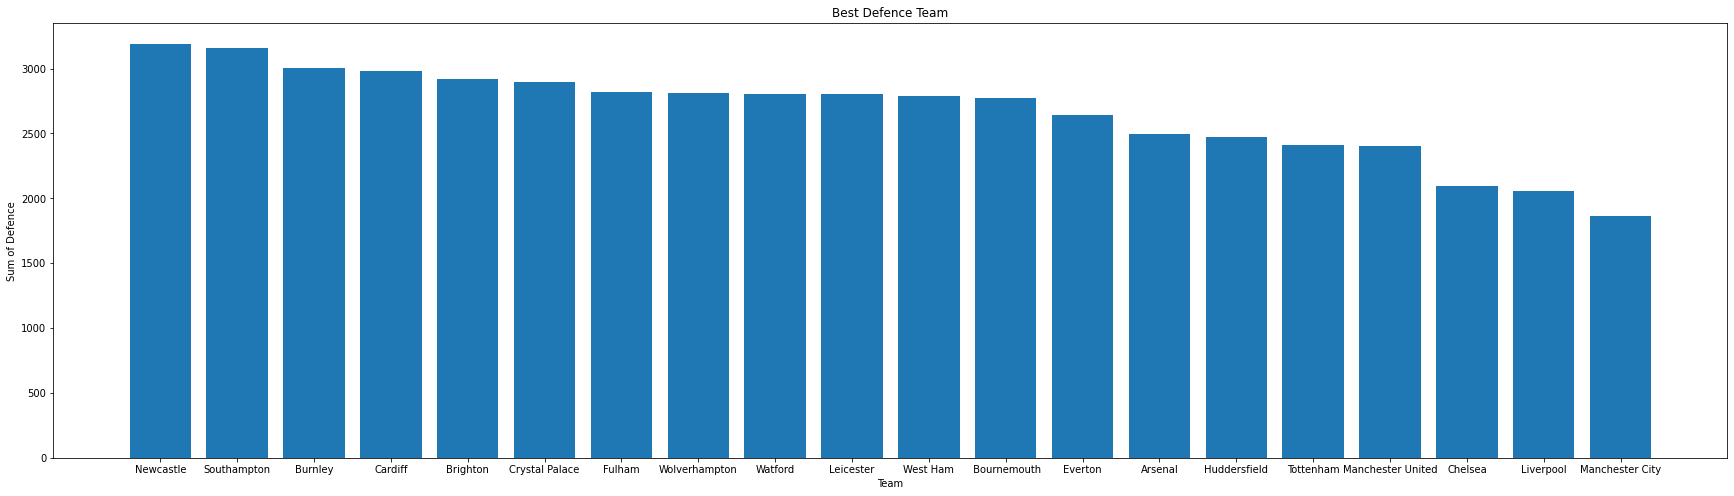

In [94]:
plt.figure(figsize=(30,8))
plt.bar(best_defence['Team'], best_defence['sum_defence'],)
plt.title('Best Defence Team')
plt.xlabel('Team')
plt.ylabel('Sum of Defence')
plt.show()

Based on the sum of attack score, Newcastle has the best defence.

# 5. Which team is good in financial aspect?

There some columns which have prefix 'finance'. We will sum them and sort them to find the maximum value 

In [95]:
finance = df.filter(regex='finance')
finance.head()

,finance _live_games_televised,finance _tv_revenue,finance _team_market,finance _market_average
0,26,150986355,1003200000,39987200
1,29,152425146,836440000,34848000
2,25,146030216,779460000,29981600
3,26,145230801,735240000,29409600
4,25,142193180,701800000,26989600


In [98]:
finance.dtypes

finance _live_games_televised    int64
finance _tv_revenue              int64
finance _team_market             int64
finance _market_average          int64
dtype: object

In [97]:
df['sum_finance'] = finance.sum(axis=1)               #create new column as the sum of all column with  prefix 'attack...'
df.head(2)

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy,sum_attack,sum_defence,sum_finance
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,26581,112,1814,4240,783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0,35136.0,1866,1194173581
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,23638,98,2250,3416,721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4,31527.2,2059,1023713175


In [100]:
best_finance = df[['Team', 'sum_finance']].sort_values('sum_finance', ascending=False)
best_finance.head(5)

,Team,sum_finance
0,Manchester City,1194173581
1,Liverpool,1023713175
2,Chelsea,955471841
3,Tottenham,909880427
4,Arsenal,870982805


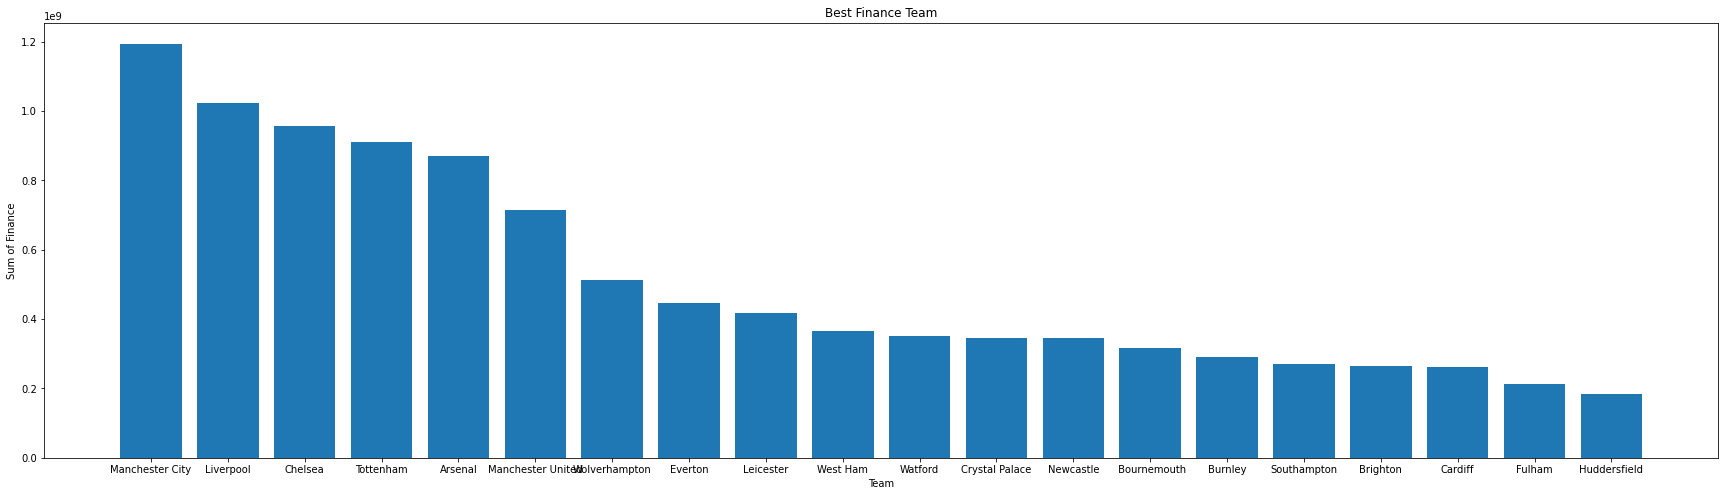

In [101]:
plt.figure(figsize=(30,8))
plt.bar(best_finance['Team'], best_finance['sum_finance'],)
plt.title('Best Finance Team')
plt.xlabel('Team')
plt.ylabel('Sum of Finance')
plt.show()

In [ ]:
Based on the sum of attack score, Manchaster City has the best finance condition.